In [131]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.optimize import minimize

### Import Simulation Data

In [132]:
# import data
t1, y1 = np.loadtxt("data/supersat.csv", delimiter=",", skiprows=1, unpack=True)
t2, y2 = np.loadtxt("data/mu1mu0.csv", delimiter=",", skiprows=1, unpack=True)
t3, y3 = np.loadtxt("data/mu2mu0.csv", delimiter=",", skiprows=1, unpack=True)
t4, y4 = np.loadtxt("data/mu3mu0.csv", delimiter=",", skiprows=1, unpack=True)
t5, y5 = np.loadtxt("data/B.csv", delimiter=",", skiprows=1, unpack=True)
t6, y6 = np.loadtxt("data/G.csv", delimiter=",", skiprows=1, unpack=True)

# Convert all time arrays from minutes to seconds
t1_sec = t1 * 60.0
t2_sec = t2 * 60.0
t3_sec = t3 * 60.0
t4_sec = t4 * 60.0
t5_sec = t5 * 60.0
t6_sec = t6 * 60.0

# Convert mu1/mu0, mu2/mu0, mu3/mu0 from cm, cm^2, cm^3 to m, m^2, m^3
y2 = y2 * 0.01          # cm to m
y3 = y3 * 0.0001        # cm^2 to m^2
y4 = y4 * 0.000001  #   1e-11    # cm^3 to m^3

# interpolate data with linear interpolation (time in seconds)
y1_interp = interp1d(t1_sec, y1, kind='linear', bounds_error=False, fill_value="extrapolate")
y2_interp = interp1d(t2_sec, y2, kind='linear', bounds_error=False, fill_value="extrapolate")
y3_interp = interp1d(t3_sec, y3, kind='linear', bounds_error=False, fill_value="extrapolate")
y4_interp = interp1d(t4_sec, y4, kind='linear', bounds_error=False, fill_value="extrapolate")
y5_interp = interp1d(t5_sec, y5, kind='linear', bounds_error=False, fill_value="extrapolate")
y6_interp = interp1d(t6_sec, y6, kind='linear', bounds_error=False, fill_value="extrapolate")

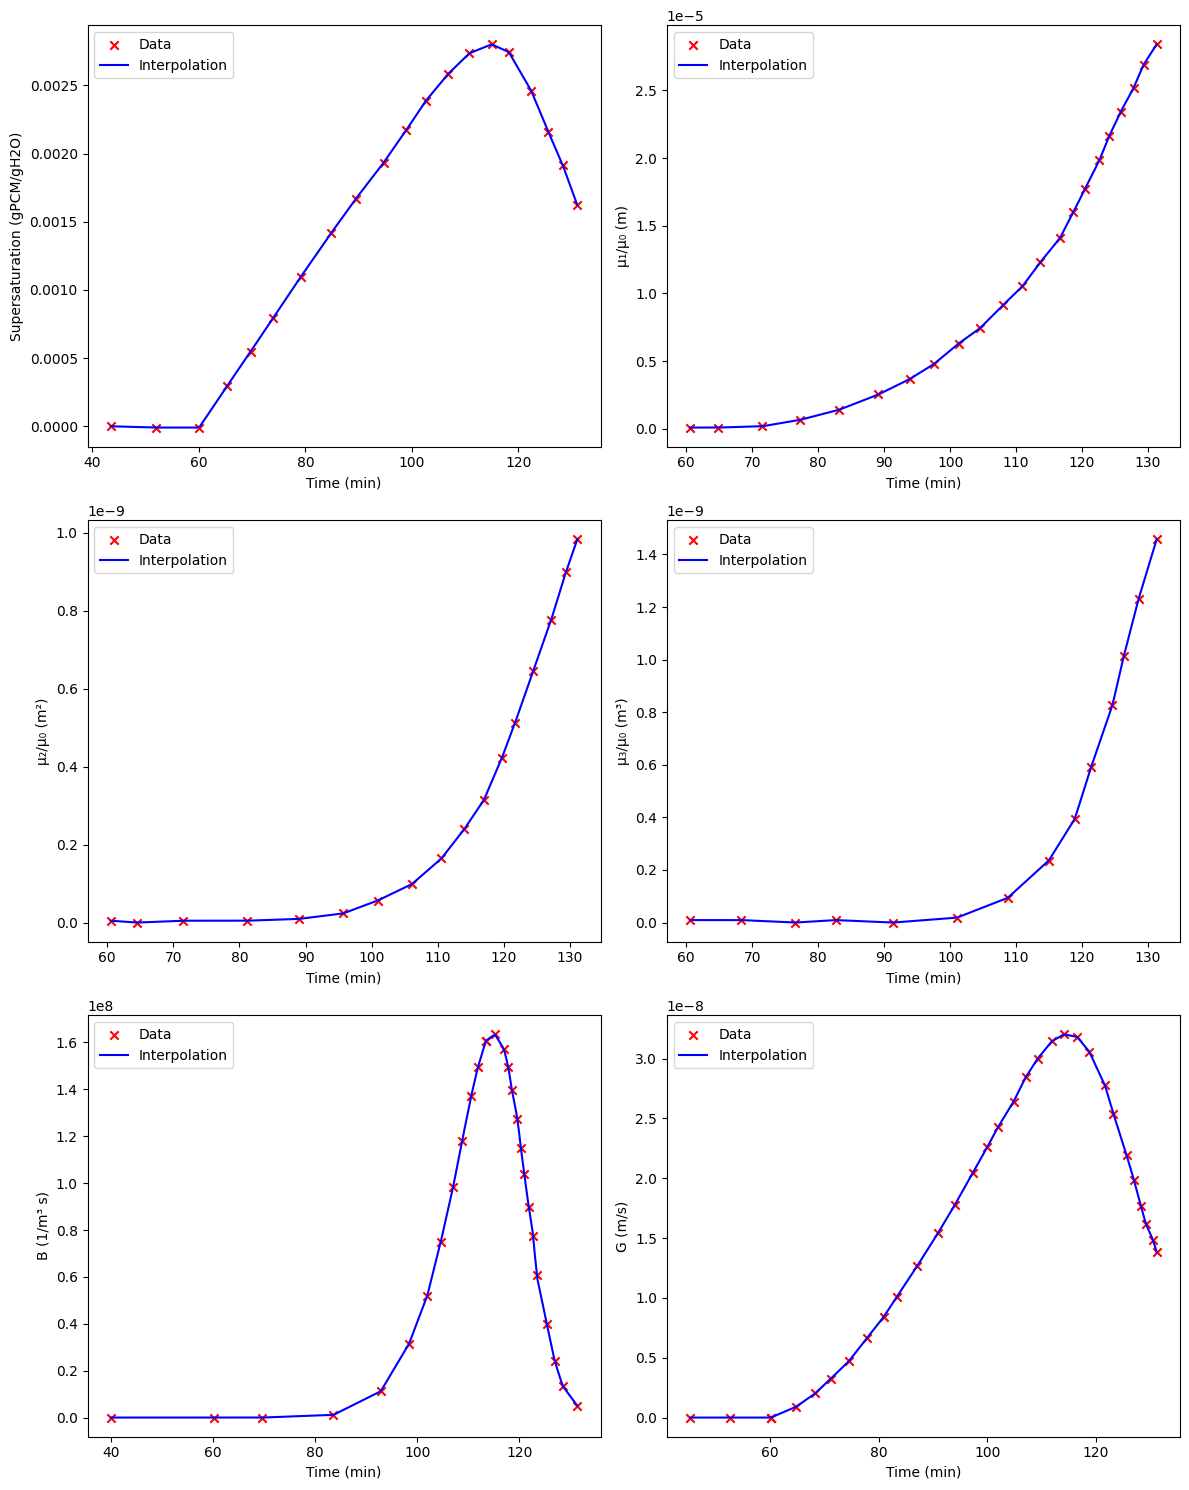

In [133]:
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# 1. supersat.csv
axs[0, 0].scatter(t1_sec / 60, y1, color="red", label="Data", marker='x')
x1_plot = np.linspace(np.min(t1_sec), np.max(t1_sec), 200)
axs[0, 0].plot(x1_plot / 60, y1_interp(x1_plot), color="blue", label="Interpolation")
axs[0, 0].set_xlabel("Time (min)")
axs[0, 0].set_ylabel("Supersaturation (gPCM/gH2O)")
axs[0, 0].legend()

# 2. mu1mu0.csv
axs[0, 1].scatter(t2_sec / 60, y2, color="red", marker='x', label="Data")
x2_plot = np.linspace(np.min(t2_sec), np.max(t2_sec), 200)
axs[0, 1].plot(x2_plot / 60, y2_interp(x2_plot), color="blue", label="Interpolation")
axs[0, 1].set_xlabel("Time (min)")
axs[0, 1].set_ylabel("μ₁/μ₀ (m)")
axs[0, 1].legend()

# 3. mu2mu0.csv
axs[1, 0].scatter(t3_sec / 60, y3, color="red", marker='x', label="Data")
x3_plot = np.linspace(np.min(t3_sec), np.max(t3_sec), 200)
axs[1, 0].plot(x3_plot / 60, y3_interp(x3_plot), color="blue", label="Interpolation")
axs[1, 0].set_xlabel("Time (min)")
axs[1, 0].set_ylabel("μ₂/μ₀ (m²)")
axs[1, 0].legend()

# 4. mu3mu0.csv
axs[1, 1].scatter(t4_sec / 60, y4, color="red", marker='x', label="Data")
x4_plot = np.linspace(np.min(t4_sec), np.max(t4_sec), 200)
axs[1, 1].plot(x4_plot / 60, y4_interp(x4_plot), color="blue", label="Interpolation")
axs[1, 1].set_xlabel("Time (min)")
axs[1, 1].set_ylabel("μ₃/μ₀ (m³)")
axs[1, 1].legend()

# 5. B.csv
axs[2, 0].scatter(t5_sec / 60, y5, color="red", marker='x', label="Data")
x5_plot = np.linspace(np.min(t5_sec), np.max(t5_sec), 200)
axs[2, 0].plot(x5_plot / 60, y5_interp(x5_plot), color="blue", label="Interpolation")
axs[2, 0].set_xlabel("Time (min)")
axs[2, 0].set_ylabel("B (1/m³ s)")
axs[2, 0].legend()

# 6. G.csv
axs[2, 1].scatter(t6_sec / 60, y6, color="red", marker='x', label="Data")
x6_plot = np.linspace(np.min(t6_sec), np.max(t6_sec), 200)
axs[2, 1].plot(x6_plot / 60, y6_interp(x6_plot), color="blue", label="Interpolation")
axs[2, 1].set_xlabel("Time (min)")
axs[2, 1].set_ylabel("G (m/s)")
axs[2, 1].legend()

plt.tight_layout()
plt.show()

### Saturation Curve (Paracetamole in Water)

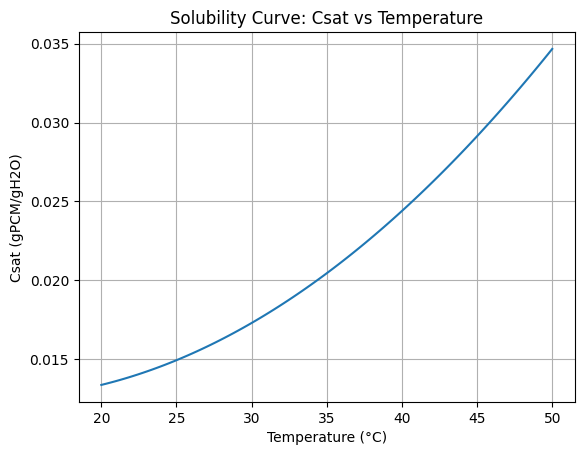

In [134]:
sat_const = 1.5846e-5, -9.0567e-03, 1.3066   # Solubility: second order polynomial, gPCM/gH2O, K, K^

def Csat(T, const=sat_const):
    """The solubility of paracetamol in water (g PCM/g water) as a function of temperature (in K)"""
    A, B, C = const
    return A*T**2 + B*T + C    # kg/m^3


T_plot = np.linspace(20+273.15, 50+273.15, 100)
Csat_vals = [Csat(T) for T in T_plot]

plt.figure()
plt.plot(T_plot - 273.15, Csat_vals)
plt.xlabel("Temperature (°C)")
plt.ylabel("Csat (gPCM/gH2O)")
plt.title("Solubility Curve: Csat vs Temperature")
plt.grid()
plt.show()

In [135]:
from scipy.optimize import root_scalar

# Given concentration to find saturation temperature for
C_target = 0.025  # gPCM/gH2O

def f(T):
    return Csat(T) - C_target

sol = root_scalar(f, bracket=[273.15+20, 273.15+100], method='brentq')
T_saturation = sol.root if sol.converged else None

print(f"Temperature at which concentration {C_target} gPCM/gH2O is saturated: {T_saturation - 273.15:.2f} °C" if T_saturation is not None else "Root not found in given range.")

print('Temp_init:',40.68 + 3.9)

Temperature at which concentration 0.025 gPCM/gH2O is saturated: 40.68 °C
Temp_init: 44.58


### State Space Model

In [136]:
kb_guess = np.exp(45.81)            # Nucleation rate constant, m^-3 s^-1
b_guess = 6.23                      # Nucelation Order
kg_guess = np.exp(-4.11)            # Growth rate constant, m/s
g_guess = 1.54                      # Growth order
kv_guess = 1.0                      # Volumetric shape factor of prism approximated as rectangular solid
rho_cry_guess = 1400                # kg/m^3, crystal density of common stable polymorph

rad_zero = 0                        # initial radius
V = 1                             # m^3, crystallizer/liquid volume

# theta includes all parameters to estimate
theta_guess = [kg_guess, g_guess, kb_guess, b_guess, rho_cry_guess*kv_guess]


def rel_sat(C, T):
    """Cdiff = C - Csat(T)"""
    return np.maximum(0, C - Csat(T))

def B(Cdiff, kb, b):
    """Total nucleation rate (0 if undersaturated)."""
    # if Cdiff < 0:
    #     return 0.0
    return kb * Cdiff**b

def growth(Cdiff, kg, g):
    """Crystal growth rate (m/s). 0 if undersaturated or negative."""
    # if Cdiff < 0:
    #     return 0.0
    return kg * Cdiff**g

def diffeq(y, t, theta, cool_rate=3.9/3600, r=0.0):
    """
    Moment balance ODEs + solute balance.

    y = [mu0, mu1, mu2, mu3, C, T]
    Assume V = 1
    cool_rate in K/s
    """
    mu0, mu1, mu2, mu3, C, T = y
    kg, g, kb, b, rho_cry_kv = theta 

    Cdiff = rel_sat(C, T)
    N = B(Cdiff, kb, b)
    G = growth(Cdiff, kg, g)

    dmu0_dt = N
    dmu1_dt = 1 * G * mu0 + N * r**1
    dmu2_dt = 2 * G * mu1 + N * r**2
    dmu3_dt = 3 * G * mu2 + N * r**3
    rho_sol = 1000 # kg/m^3, density of solution
    dC_dt = -rho_cry_kv/rho_sol * (3 * G * mu2 + N * r**3)  # mass of crystals per m^3 per s
    dT_dt = -cool_rate

    return [dmu0_dt, dmu1_dt, dmu2_dt, dmu3_dt, dC_dt, dT_dt]


def g(x, t, theta, cool_rate=3.9/3600):
    mu0, mu1, mu2, mu3, C, T = x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5]
    kg, g, kb, b, rho_cry_kv = theta 
    T = T[0] - cool_rate * t
    Cdiff = rel_sat(C, T)
    
    y1 = Cdiff
    # Avoid divide by zero: where mu0==0, set quantity to zero
    y2 = np.zeros_like(mu0)
    y3 = np.zeros_like(mu0)
    y4 = np.zeros_like(mu0)
    nonzero = mu0 != 0
    y2[nonzero] = mu1[nonzero] / mu0[nonzero]
    y3[nonzero] = mu2[nonzero] / mu0[nonzero]
    y4[nonzero] = mu3[nonzero] / mu0[nonzero]

    y5 = np.zeros_like(Cdiff)
    y5[nonzero] = B(Cdiff[nonzero], kb, b)
    y6 = np.zeros_like(Cdiff)
    y6[nonzero] = growth(Cdiff[nonzero], kg, g)  

    return [y1, y2, y3, y4, y5, y6]

### Fit G and B only

Method 3 - Linear Regression Problem

b_fit  = 6.196
kb_fit = 1.1011e+24

=== Joint 95% CI (chi2-based, same as cost-surface ellipse) ===
b:  [6.096, 6.296]
kb: [5.9415e+23, 2.0406e+24]


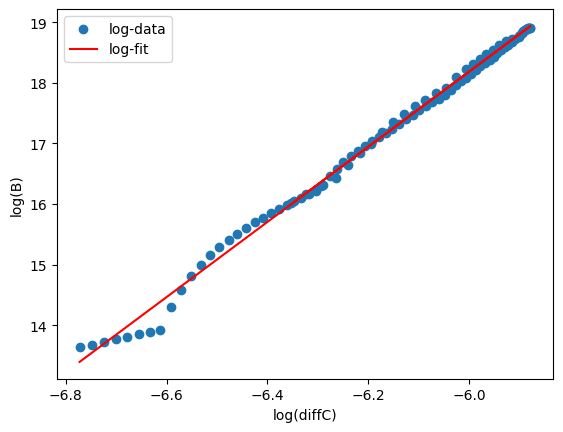

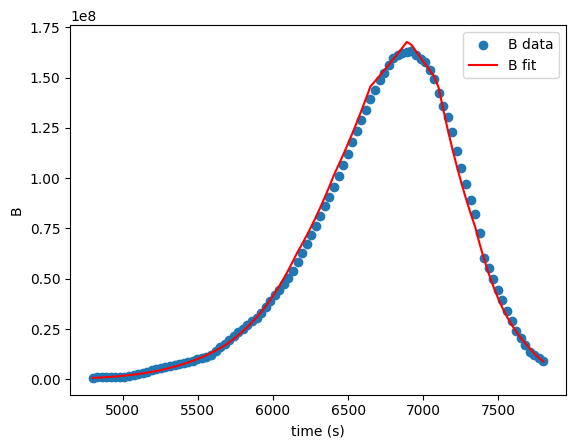

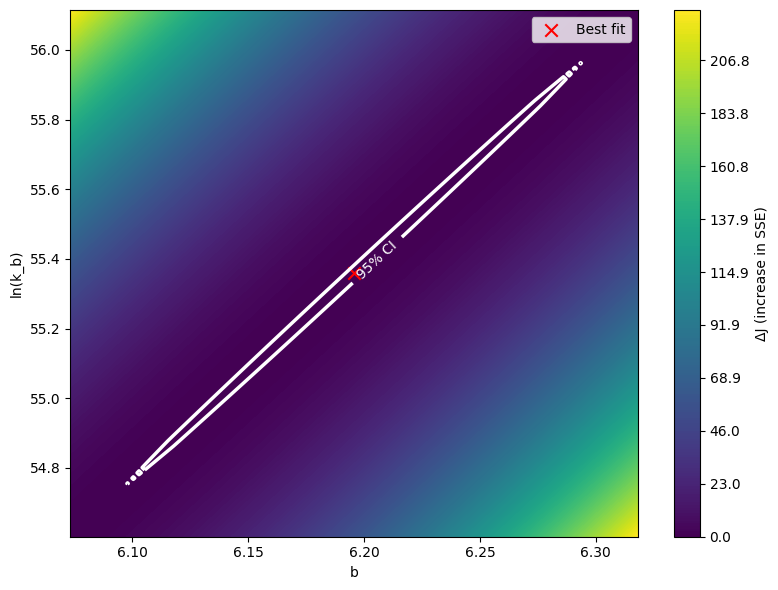

In [137]:
from scipy.stats import chi2

# Prepare data
trange = np.linspace(80*60, 130*60, 100)
diffC = y1_interp(trange)
B = y5_interp(trange)

# Mask out nonpositive values for log-transform
mask = (diffC > 0) & (B > 0)
diffC = diffC[mask]
B = B[mask]

x = np.log(diffC)
y = np.log(B)
A = np.column_stack((x, np.ones_like(x)))  # [log(diffC), intercept]

# Linear regression in log space: log(B) = b*log(diffC) + ln_kb
coeff, residuals, rank, svals = np.linalg.lstsq(A, y, rcond=None)
b_fit, ln_kb_fit = coeff
kb_fit = np.exp(ln_kb_fit)

n = len(y)    # number of data points
p = 2         # number of parameters

# Compute sum of squared errors (SSE)
if residuals.size > 0:
    SSE_min = residuals[0]
else:
    SSE_min = np.sum((y - A @ coeff) ** 2)

s2 = SSE_min / (n - p)  # error variance estimate

# Covariance and standard errors for b and ln_kb
XtX_inv = np.linalg.inv(A.T @ A)
cov_beta = s2 * XtX_inv
se_b = np.sqrt(cov_beta[0, 0])
se_lnkb = np.sqrt(cov_beta[1, 1])

print(f"b_fit  = {b_fit:.4g}")
print(f"kb_fit = {kb_fit:.4e}")

# Joint 95% CI (chi2-based, cost-surface ellipse)
chi2_val = chi2.ppf(0.95, df=2)  # χ²_{2,0.95}

b_lo_chi = b_fit - np.sqrt(chi2_val) * se_b
b_hi_chi = b_fit + np.sqrt(chi2_val) * se_b
lnkb_lo_chi = ln_kb_fit - np.sqrt(chi2_val) * se_lnkb
lnkb_hi_chi = ln_kb_fit + np.sqrt(chi2_val) * se_lnkb

kb_lo_chi = np.exp(lnkb_lo_chi)
kb_hi_chi = np.exp(lnkb_hi_chi)

print("\n=== Joint 95% CI (chi2-based, same as cost-surface ellipse) ===")
print(f"b:  [{b_lo_chi:.4g}, {b_hi_chi:.4g}]")
print(f"kb: [{kb_lo_chi:.4e}, {kb_hi_chi:.4e}]")

# Diagnostic plot: log-log fit for B vs diffC
plt.figure()
plt.scatter(x, y, label="log-data")
plt.plot(x, A @ coeff, label="log-fit", color="red")
plt.xlabel("log(diffC)")
plt.ylabel("log(B)")
plt.legend()
plt.show()

# Diagnostic plot: B vs time, both data and fit
plt.figure()
plt.scatter(trange[mask], B, label="B data")
plt.plot(trange[mask], kb_fit * diffC**b_fit, label="B fit", color="red")
plt.xlabel("time (s)")
plt.ylabel("B")
plt.legend()
plt.show()

# Cost surface in (b, ln kb) parameter space with 95% CI ellipse
num_b = 100
num_lnkb = 100

b_vals = np.linspace(b_fit - 3 * se_b, b_fit + 3 * se_b, num_b)
lnkb_vals = np.linspace(ln_kb_fit - 3 * se_lnkb, ln_kb_fit + 3 * se_lnkb, num_lnkb)

B_grid, LNK_grid = np.meshgrid(b_vals, lnkb_vals)
J = np.zeros_like(B_grid)

# Evaluate cost function J at each grid point
for i in range(B_grid.shape[0]):
    for j in range(B_grid.shape[1]):
        b_test = B_grid[i, j]
        lnkb_test = LNK_grid[i, j]
        beta_test = np.array([b_test, lnkb_test])
        resid = y - A @ beta_test
        J[i, j] = resid @ resid

J_min = np.min(J)
DeltaJ = J - J_min  # cost above minimum

deltaJ_95 = s2 * chi2_val  # 95% joint confidence contour

levels = np.linspace(np.min(DeltaJ), np.max(DeltaJ), 200)

plt.figure(figsize=(8, 6))

cs = plt.contourf(
    B_grid,
    LNK_grid,
    DeltaJ,
    levels=levels,
    cmap="viridis"
)
cbar = plt.colorbar(cs)
cbar.set_label("ΔJ (increase in SSE)")

# 95% CI contour
c95 = plt.contour(
    B_grid,
    LNK_grid,
    DeltaJ,
    levels=[deltaJ_95],
    colors="white",
    linewidths=2.5
)
plt.clabel(c95, fmt={deltaJ_95: "95% CI"}, fontsize=10, colors="white")

# Mark best-fit point
plt.scatter([b_fit], [ln_kb_fit],
            color="red", marker="x", s=80, label="Best fit")

plt.xlabel("b")
plt.ylabel("ln(k_b)")
# plt.title("Cost Surface in (b, ln k_b)")
plt.legend()
plt.tight_layout()
plt.savefig("figs/B_fit_cost_surface.png", dpi=300)
plt.show()


g_fit  = 1.537
kg_fit = 2.6868e-04

=== Joint 95% CI (chi2-based, same as cost-surface ellipse) ===
g:  [1.53, 1.544]
kg: [2.5710e-04, 2.8078e-04]


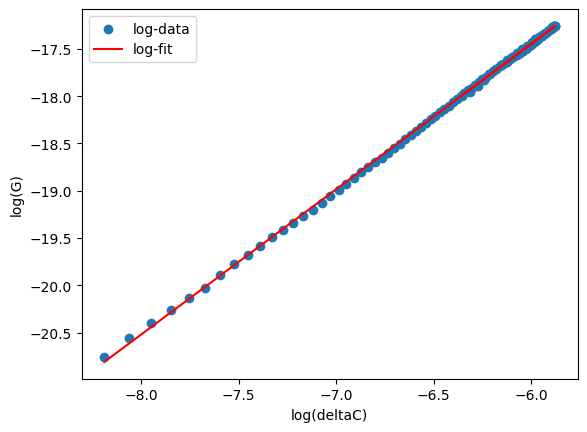

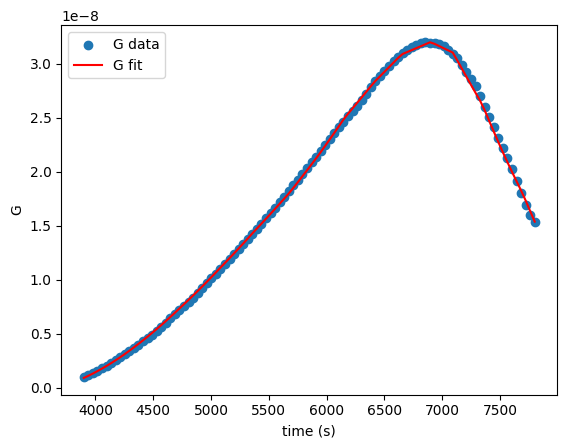

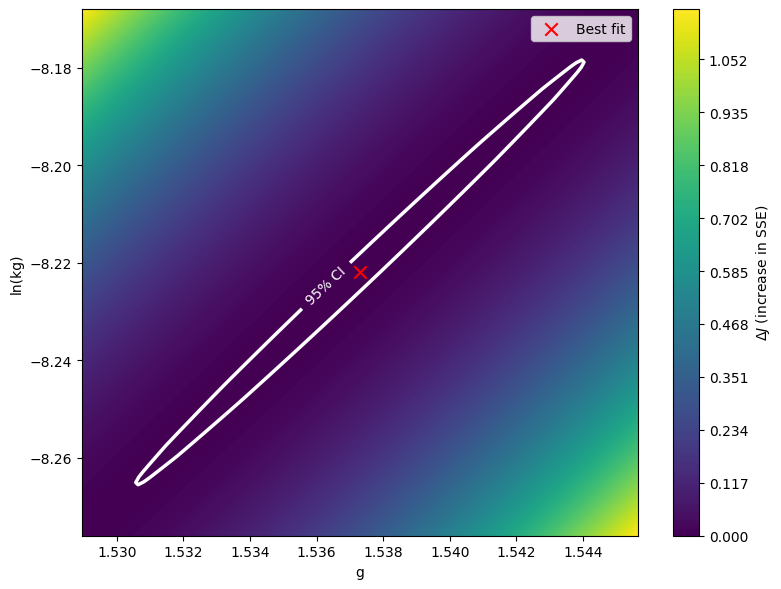

In [138]:
trange = np.linspace(65*60, 130*60, 100)
diffC = y1_interp(trange)
G = y6_interp(trange)

# Mask to positive values to avoid log issues
mask = (diffC > 0) & (G > 0)
diffC = diffC[mask]
G = G[mask]

x = np.log(diffC)
y = np.log(G)
A = np.column_stack((x, np.ones(len(x))))

# Linear regression in log space
coefficients = np.linalg.lstsq(A, y, rcond=None)[0]
g_fit, lnkg_fit = coefficients
kg_fit = np.exp(lnkg_fit)

print(f"g_fit  = {g_fit:.4g}")
print(f"kg_fit = {kg_fit:.4e}")

# Joint 95% CI (chi2-based), matching the cost-surface ellipse
chi2_val = chi2.ppf(0.95, df=2)

g_lo = g_fit - np.sqrt(chi2_val) * se_g
g_hi = g_fit + np.sqrt(chi2_val) * se_g
lnkg_lo = lnkg_fit - np.sqrt(chi2_val) * se_lnkg
lnkg_hi = lnkg_fit + np.sqrt(chi2_val) * se_lnkg

kg_lo = np.exp(lnkg_lo)
kg_hi = np.exp(lnkg_hi)

print("\n=== Joint 95% CI (chi2-based, same as cost-surface ellipse) ===")
print(f"g:  [{g_lo_chi:.4g}, {g_hi_chi:.4g}]")
print(f"kg: [{kg_lo_chi:.4e}, {kg_hi_chi:.4e}]")

plt.figure()
plt.scatter(x, y, label="log-data")
plt.plot(x, A @ coefficients, label="log-fit", color="red")
plt.xlabel("log(deltaC)")
plt.ylabel("log(G)")
plt.legend()
plt.show()

plt.figure()
plt.scatter(trange[mask], G, label="G data")
plt.plot(trange[mask], kg_fit * diffC**g_fit, label="G fit", color="red")
plt.xlabel("time (s)")
plt.ylabel("G")
plt.legend()
plt.show()

# Cost surface for (g, lnkg)

n = len(y)
p = 2

resid_min = y - A @ coefficients
SSE_min = resid_min @ resid_min
s2 = SSE_min / (n - p)

XtX_inv = np.linalg.inv(A.T @ A)
cov_beta = s2 * XtX_inv

se_g = np.sqrt(cov_beta[0, 0])
se_lnkg = np.sqrt(cov_beta[1, 1])

num_g = 100
num_lnkg = 100

g_vals = np.linspace(g_fit - 3*se_g, g_fit + 3*se_g, num_g)
lnkg_vals = np.linspace(lnkg_fit - 3*se_lnkg, lnkg_fit + 3*se_lnkg, num_lnkg)

GEXP_grid, LNK_grid = np.meshgrid(g_vals, lnkg_vals)
J = np.zeros_like(GEXP_grid)

for i in range(GEXP_grid.shape[0]):
    for j in range(GEXP_grid.shape[1]):
        g_test = GEXP_grid[i, j]
        lnkg_test = LNK_grid[i, j]
        beta_test = np.array([g_test, lnkg_test])
        resid = y - A @ beta_test
        J[i, j] = resid @ resid

J_min = np.min(J)
DeltaJ = J - J_min

deltaJ_95 = s2 * chi2.ppf(0.95, df=2)

levels = np.linspace(np.min(DeltaJ), np.max(DeltaJ), 200)

plt.figure(figsize=(8, 6))
cs = plt.contourf(
    GEXP_grid,
    LNK_grid,
    DeltaJ,
    levels=levels,
    cmap="viridis"
)
cbar = plt.colorbar(cs)
cbar.set_label(r"$\Delta J$ (increase in SSE)")

c95 = plt.contour(
    GEXP_grid,
    LNK_grid,
    DeltaJ,
    levels=[deltaJ_95],
    colors="white",
    linewidths=2.5
)
plt.clabel(c95, fmt={deltaJ_95: "95% CI"}, fontsize=10, colors="white")

plt.scatter([g_fit], [lnkg_fit],
            color="red", marker="x", s=80, label="Best fit")

plt.xlabel("g")
plt.ylabel("ln(kg)")
# plt.title("Cost Surface in (g, ln kg) Space")
plt.legend()
plt.tight_layout()
plt.savefig("figs/G_fit_cost_surface.png", dpi=300)
plt.show()
